In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
dataset_path= "Housing.csv"
df= pd.read_csv(dataset_path)

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
categorial_cols= df.select_dtypes(include=['object']).columns.to_list()
categorial_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [5]:
ordinalEncoder= OrdinalEncoder()
encoded_categorical_cols= ordinalEncoder.fit_transform(df[categorial_cols])
encoded_categorical_df= pd.DataFrame(
    encoded_categorical_cols,
    columns= categorial_cols
)
numerical_df= df.drop(categorial_cols, axis= 1)
encoded_df= pd.concat(
    [numerical_df, encoded_categorical_df], axis=1
)

In [6]:
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [56]:
normalizer= StandardScaler()
dataset_arr= normalizer.fit_transform(encoded_df)

In [59]:
X,y= dataset_arr[:,1:], dataset_arr[:,0]

In [9]:
X_train, X_val, y_train, y_val= train_test_split(X,y,test_size= 0.3, random_state= 1, shuffle= True)

In [10]:
regressor= RandomForestRegressor(random_state= 1)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [11]:
y_pred= regressor.predict(X_val)

In [12]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


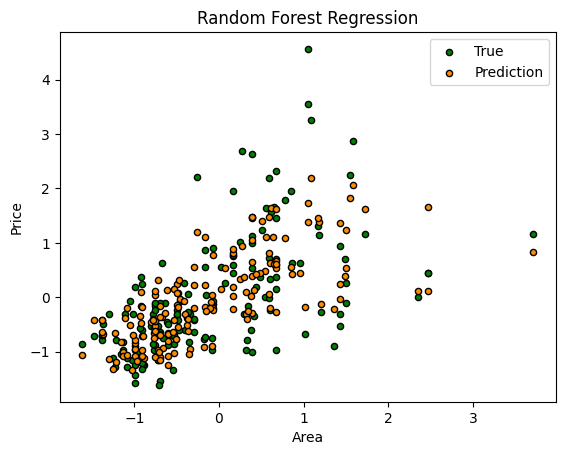

In [14]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [15]:
regressor= AdaBoostRegressor(random_state=1)
regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [16]:
y_pred= regressor.predict(X_val)

In [17]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.567680019897059
Mean Squared Error: 0.5739244030038942


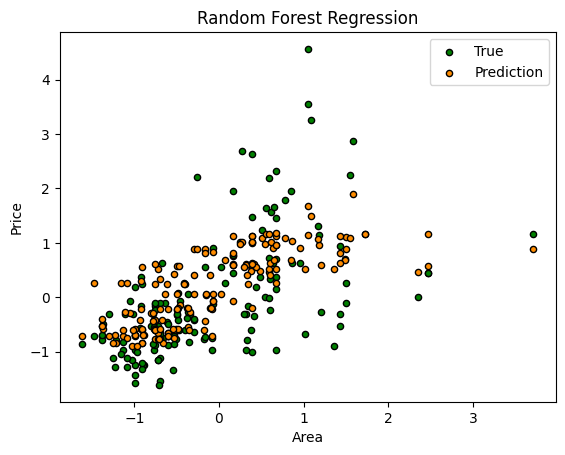

In [18]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [19]:
regressor= GradientBoostingRegressor(random_state=1)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [21]:
y_pred=regressor.predict(X_val)

In [22]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


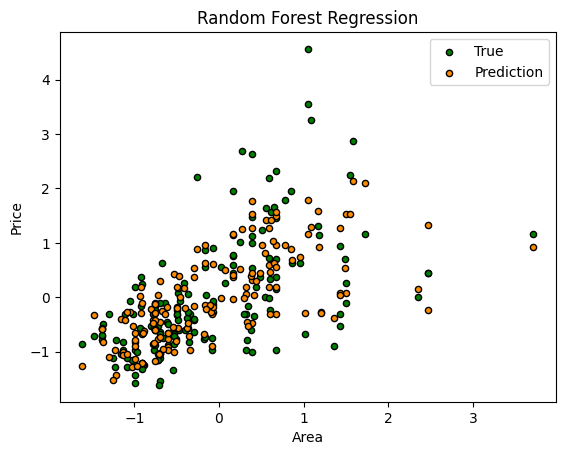

In [23]:
plt.figure()
plt.scatter(X_val[:, 0], y_val, s=20, edgecolor="black", c="green", label="True")
plt.scatter(X_val[:, 0], y_pred, s=20, edgecolor="black", c="darkorange", label="Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [71]:
X = np.array([[3], [5], [8], [10], [12]])
y = np.array([12, 20, 28, 32, 36])

In [72]:
from sklearn.tree import DecisionTreeRegressor
decisionTree= DecisionTreeRegressor(criterion="squared_error")
decisionTree.fit(X,y)

DecisionTreeRegressor()

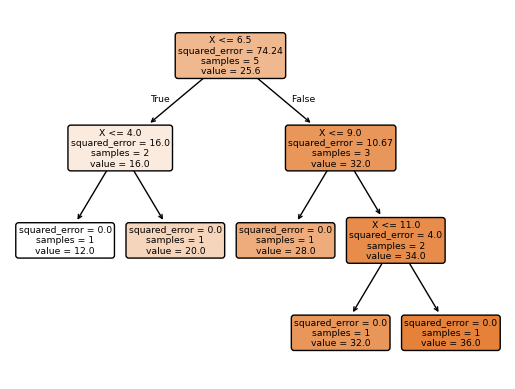

In [73]:
from sklearn.tree import plot_tree
plot_tree(decisionTree, feature_names=['X'], filled=True, rounded=True, precision=2)
plt.show()